<a href="https://colab.research.google.com/github/muhammadzulva21/image_fundamental/blob/main/neural_network/convolutional_neural_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [11]:
import os

# Definisikan path untuk data train dan data validation

base_dir = '/content/drive/MyDrive/Daun Sawit'

bercak_dir = os.path.join(base_dir, 'bercak')
normal_dir = os.path.join(base_dir, 'normal')

train_normal_dir = os.path.join(normal_dir, 'train')
train_bercak_dir = os.path.join(bercak_dir, 'train')

validasi_normal_dir = os.path.join(normal_dir, 'validasi')
validasi_bercak_dir = os.path.join(bercak_dir, 'validasi')

In [27]:
import cv2
import numpy as np

# Gather data train
train_data = []
train_label = []
for r, d, f in os.walk(train_normal_dir):
    for file in f:
        print(file)
        if ".jpg" in file:
            imagePath = os.path.join(r, file)
            image = cv2.imread(imagePath)
            image = cv2.resize(image, (150,150))
            train_data.append(image)
            label = imagePath.split(os.path.sep)[-3]
            train_label.append(label)


for r, d, f in os.walk(train_bercak_dir):
    for file in f:
        print(file)
        if ".jpg" in file:
            imagePath = os.path.join(r, file)
            image = cv2.imread(imagePath)
            image = cv2.resize(image, (150,150))
            train_data.append(image)
            label = imagePath.split(os.path.sep)[-3]
            train_label.append(label)

train_data = np.array(train_data)
train_label = np.array(train_label)

Normal 6.jpg
Normal 3.jpg
Normal 11.jpg
Normal 7.jpg
Normal 14.jpg
Normal 15.jpg
Normal 2.jpg
Normal 5.jpg
Normal 12.jpg
Normal 8.jpg
Normal 4.jpg
Normal 13.jpg
Normal 10.jpg
Normal 1.jpg
Normal 9.jpg
Bercak 83.jpg
Bercak 31.jpg
Bercak 165.jpg
Bercak 25.jpg
Bercak 72.jpg
Bercak 184.jpg
Bercak 46.jpg
Bercak 113.jpg
Bercak 61.jpg
Bercak 180.jpg
Bercak 59.jpg
Bercak 133.jpg
Bercak 195.jpg
Bercak 145.jpg
Bercak 92.jpg
Bercak 101.jpg
Bercak 193.jpg
Bercak 89.jpg
Bercak 110.jpg
Bercak 3.jpg
Bercak 215.jpg
Bercak 155.jpg
Bercak 30.jpg
Bercak 13.jpg
Bercak 112.jpg
Bercak 169.jpg
Bercak 86.jpg
Bercak 194.jpg
Bercak 95.jpg
Bercak 148.jpg
Bercak 8.jpg
Bercak 176.jpg
Bercak 118.jpg
Bercak 6.jpg
Bercak 141.jpg
Bercak 151.jpg
Bercak 50.jpg
Bercak 115.jpg
Bercak 75.jpg
Bercak 154.jpg
Bercak 171.jpg
Bercak 76.jpg
Bercak 63.jpg
Bercak 221.jpg
Bercak 117.jpg
Bercak 219.jpg
Bercak 93.jpg
Bercak 144.jpg
Bercak 190.jpg
Bercak 106.jpg
Bercak 41.jpg
Bercak 132.jpg
Bercak 212.jpg
Bercak 77.jpg
Bercak 91.jpg
B

In [13]:
len(train_data)

240

In [28]:
# Gather data validation
val_data = []
val_label = []
for r, d, f in os.walk(validasi_normal_dir):
    for file in f:
        if ".jpg" in file:
            imagePath = os.path.join(r, file)
            image = cv2.imread(imagePath)
            image = cv2.resize(image, (150,150))
            val_data.append(image)
            label = imagePath.split(os.path.sep)[-3]
            val_label.append(label)

for r, d, f in os.walk(validasi_bercak_dir):
    for file in f:
        if ".jpg" in file:
            imagePath = os.path.join(r, file)
            image = cv2.imread(imagePath)
            image = cv2.resize(image, (150,150))
            val_data.append(image)
            label = imagePath.split(os.path.sep)[-3]
            val_label.append(label)

val_data = np.array(val_data)
val_label = np.array(val_label)

In [17]:
len(val_label)

80

<h3>Data Preprocessing</h3>

In [18]:
# Tampilkan shape dari data train dan data validation
print("Train Data = ", train_data.shape)
print("Train Label = ", train_label.shape)
print("Validation Data = ", val_data.shape)
print("Validation Label = ", val_label.shape)

Train Data =  (240, 150, 150, 3)
Train Label =  (240,)
Validation Data =  (80, 150, 150, 3)
Validation Label =  (80,)


In [29]:
# Normalisasi dataset
print("Data sebelum di-normalisasi ", train_data[0][0][0])

x_train = train_data.astype('float32') / 255.0
x_val = val_data.astype('float32') / 255.0
print("Data setelah di-normalisasi ", x_train[0][0][0])

Data sebelum di-normalisasi  [255 245 243]
Data setelah di-normalisasi  [1.        0.9607843 0.9529412]


In [33]:
# Transformasi label encoder
from sklearn.preprocessing import LabelEncoder

print("Label sebelum di-encoder ", train_label[10:20])

lb = LabelEncoder()
y_train = lb.fit_transform(train_label)
y_val = lb.fit_transform(val_label)

print("Label setelah di-encoder ", y_train[10:20])

Label sebelum di-encoder  ['normal' 'normal' 'normal' 'normal' 'normal' 'bercak' 'bercak' 'bercak'
 'bercak' 'bercak']
Label setelah di-encoder  [1 1 1 1 1 0 0 0 0 0]


<h3>Definisikan Model</h3>

In [34]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, Conv2D, MaxPool2D, Flatten

In [35]:
# Feature Extraction Layer
model = Sequential()

model.add(InputLayer(input_shape=[150,150,3]))
model.add(Conv2D(filters=16, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=2, padding='same'))
model.add(Conv2D(filters=32, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=2, padding='same'))
model.add(Conv2D(filters=64, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=2, padding='same'))
model.add(Flatten())

In [36]:
# Fully Connected Layer
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [37]:
# Print model summary
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 38, 38, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 38, 38, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 19, 19, 64)       0

In [38]:
# Compile model
from tensorflow.keras.optimizers import Adam

model.compile(optimizer=Adam(lr=0.001), 
              loss='binary_crossentropy', 
              metrics=['acc'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


<h3>Training Model</h3>

In [53]:
H = model.fit(x_train, y_train, batch_size=20, epochs=15, validation_data=(x_val, y_val))

Epoch 1/15
12/12 [==============================] - 6s 485ms/step - loss: 2.3279e-06 - acc: 1.0000 - val_loss: 0.4560 - val_acc: 0.9000
Epoch 2/15
12/12 [==============================] - 6s 476ms/step - loss: 2.0853e-06 - acc: 1.0000 - val_loss: 0.4480 - val_acc: 0.9000
Epoch 3/15
12/12 [==============================] - 6s 493ms/step - loss: 2.0592e-06 - acc: 1.0000 - val_loss: 0.4444 - val_acc: 0.9000
Epoch 4/15
12/12 [==============================] - 6s 477ms/step - loss: 1.9778e-06 - acc: 1.0000 - val_loss: 0.4521 - val_acc: 0.9000
Epoch 5/15
12/12 [==============================] - 6s 476ms/step - loss: 1.9248e-06 - acc: 1.0000 - val_loss: 0.4583 - val_acc: 0.9000
Epoch 6/15
12/12 [==============================] - 6s 475ms/step - loss: 1.8244e-06 - acc: 1.0000 - val_loss: 0.4501 - val_acc: 0.9000
Epoch 7/15
12/12 [==============================] - 6s 475ms/step - loss: 1.7662e-06 - acc: 1.0000 - val_loss: 0.4566 - val_acc: 0.9000
Epoch 8/15
12/12 [==============================

<h3>Evaluasi Model</h3>

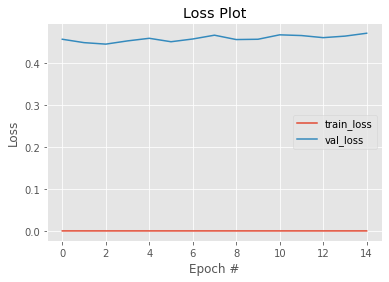

In [54]:
%matplotlib inline

import matplotlib.pyplot as plt

plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 15), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 15), H.history["val_loss"], label="val_loss")
plt.title("Loss Plot")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend()
plt.show()

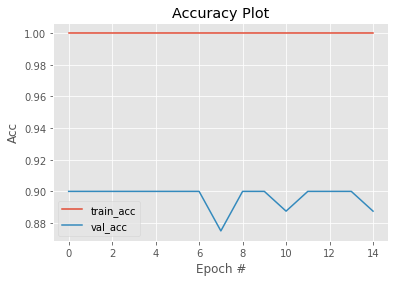

In [55]:
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 15), H.history["acc"], label="train_acc")
plt.plot(np.arange(0, 15), H.history["val_acc"], label="val_acc")
plt.title("Accuracy Plot")
plt.xlabel("Epoch #")
plt.ylabel("Acc")
plt.legend()
plt.show()

In [51]:
from sklearn.metrics import classification_report

pred = model.predict(x_val)
labels = (pred > 0.5).astype(np.int)

print(classification_report(y_val, labels))

              precision    recall  f1-score   support

           0       0.96      0.93      0.95        75
           1       0.29      0.40      0.33         5

    accuracy                           0.90        80
   macro avg       0.62      0.67      0.64        80
weighted avg       0.92      0.90      0.91        80



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  after removing the cwd from sys.path.
